In [1]:
import re 
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#laod archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv',mode = 'wb') as file:
    file.write(response.content)

In [4]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')


In [5]:
#load json data
tweet_json =pd.read_json('tweet-json.txt', lines=True)

## Assess

In [6]:

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [12]:
twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [13]:
twitter_archive.rating_numerator.sort_values(ascending=False)

979     1776
313      960
189      666
188      420
2074     420
1120     204
290      182
902      165
1779     144
1634     143
1635     121
1228      99
1843      88
433       84
1254      80
695       75
340       75
1351      60
1202      50
1274      45
1433      44
763       27
1712      26
516       24
1663      20
55        17
285       15
291       15
83        14
866       14
        ... 
2183       3
1314       3
1928       3
765        3
2202       3
1692       3
1478       3
1898       3
1249       3
2305       3
2079       2
2326       2
2349       2
2237       2
2246       2
1920       2
1761       2
2310       2
1764       2
1940       1
2038       1
2091       1
1869       1
1446       1
605        1
2338       1
2261       1
2335       1
1016       0
315        0
Name: rating_numerator, Length: 2356, dtype: int64

In [14]:
#find all tweets that contain two fractions in the text
mask=twitter_archive.text.str.contains('\d+/\d\d.+\d+/\d\d')
twitter_archive[mask]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
561,802624713319034886,NaN,NaN,2016-11-26 21:26:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Yep... just as I suspected. Yo...",7.776842e+17,4.196984e+09,2016-09-19 01:42:24 +0000,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
860,763167063695355904,NaN,NaN,2016-08-10 00:16:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Eve. She's a raging alcoho...,6.732953e+17,4.196984e+09,2015-12-06 00:17:55 +0000,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [15]:
#find all tweets that contain decimals in the rating numerator. 
mask=twitter_archive.text.str.contains('\d+\.\d+/\d\d')
twitter_archive[mask]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [16]:
#find all tweets that have the doggo and pupper dog types listed in the text
condition1 =  twitter_archive.text.str.contains('doggo')
condition2 =  twitter_archive.text.str.contains('pupper')
mask = condition1 & condition2
twitter_archive[mask]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None


In [17]:
twitter_archive.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Lucy            11
Oliver          11
Penny           10
Tucker          10
Lola            10
Bo               9
Winston          9
Sadie            8
the              8
Buddy            7
an               7
Bailey           7
Daisy            7
Toby             7
Koda             6
Scout            6
Stanley          6
Rusty            6
Dave             6
Jack             6
Jax              6
Leo              6
Milo             6
Bella            6
Oscar            6
Oakley           5
              ... 
Aubie            1
Stefan           1
Emmie            1
Sundance         1
Jockson          1
infuriating      1
Jackie           1
Darby            1
Rueben           1
Bones            1
Willem           1
Julius           1
BeBe             1
Cupid            1
Evy              1
Millie           1
River            1
Ito              1
Murphy           1
Yukon            1
Rufio            1
Corey       

#### Quality
##### `twitter_archive` table
- Retweets are listed in the table
- Some of the tweets that contain two ratings extract the wrong rating that doesn't have a denominator of 10 
- Tweets that contain decimals in the rating numbeator incorrectly extract the numerator after the decimal point
- Dog names that are null are represented by 'none'
- Some dog names contain common words like a and an instead of a real name 
- Timestamp is stored as a string instead of a datetime object
- Some tweets have two dog types listed
- Some tweets don't contain pictures

##### `image_predictions` table
- Breed names sometimes start with lowercase letter, sometimes uppercase

##### `tweet_json` table
-  Retweets are listed in the table

#### Tidiness
- Dog types should be combined into one column. 
- Rating numerator and denominator should all be combined into one column. 

## Clean

In [18]:
#create copies of dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Some tweets don't contain pictures

#### Define

Create a list of tweet ids from the image predictions table. 
Compare the lists of tweet ids for the archive and json tables to the ids in the image predictions table and only keep tweets that contain images. 

##### Code

In [19]:
#create list of tweet ids
prediction_ids = list(image_predictions_clean.tweet_id)

#only keep the tweets that contain images
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['tweet_id'].isin(prediction_ids)]

tweet_json_clean = tweet_json_clean[tweet_json_clean['id'].isin(prediction_ids)]

##### Test

In [20]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
dtypes: float64(4), int64(3), objec

In [21]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2073 non-null datetime64[ns]
display_text_range               2073 non-null object
entities                         2073 non-null object
extended_entities                2073 non-null object
favorite_count                   2073 non-null int64
favorited                        2073 non-null bool
full_text                        2073 non-null object
geo                              0 non-null float64
id                               2073 non-null int64
id_str                           2073 non-null int64
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_status_id_str        23 non-null float64
in_reply_to_user_id              23 non-null float64
in_reply_to_user_id_str          23 n

### There are retweets in the archive and the json tables that need to be removed

#### Define

Only keep tweets that have a null value for the retweet status columns. 

##### Code

In [22]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'].isnull()]

##### Test

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(4), int64(3), object(1

In [24]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1994 non-null datetime64[ns]
display_text_range               1994 non-null object
entities                         1994 non-null object
extended_entities                1994 non-null object
favorite_count                   1994 non-null int64
favorited                        1994 non-null bool
full_text                        1994 non-null object
geo                              0 non-null float64
id                               1994 non-null int64
id_str                           1994 non-null int64
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_status_id_str        23 non-null float64
in_reply_to_user_id              23 non-null float64
in_reply_to_user_id_str          23 n

### Timestamp is stored as a string instead of a datetime object

#### Define

Convert timestamp in archive table to datetime object

##### Code

In [25]:
#convert timestamp to datetime object
twitter_archive_clean.timestamp= pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: datetime64[ns](1), flo

#### Dog names that are null are represented by 'none' and some dog names contain common words like a and an instead of a real name 

#### Define

Replace names that are currently null, as well as names that contain common words like a, with a null value. 

##### Code

In [27]:
#list of words that aren't names
names = ['None', 'a', 'an', 'the', 'all']

#replace all invalid names with null values
for name in names:
    twitter_archive_clean.name.replace(name, np.nan, inplace=True)

##### Test

In [28]:
twitter_archive_clean.name.value_counts()

Charlie       11
Cooper        10
Lucy          10
Oliver        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Toby           7
Lola           7
Daisy          7
Stanley        6
Bella          6
Jax            6
Bo             6
Koda           6
Rusty          5
Milo           5
Bailey         5
Louis          5
Dave           5
Oscar          5
Chester        5
Scout          5
Leo            5
Buddy          5
Sophie         4
Oakley         4
Winnie         4
Derek          4
              ..
Bronte         1
Mary           1
Jazz           1
Christoper     1
Murphy         1
Robin          1
Jessiga        1
Ito            1
Saydee         1
Beemo          1
Travis         1
O              1
Callie         1
Traviss        1
Rocco          1
Stark          1
Jessifer       1
Tino           1
Kendall        1
Hanz           1
Emma           1
Nollie         1
Willem         1
Julius         1
Cupid          1
Evy            1
Millie         1
River         

#### Some of the tweets that contain two ratings extract the wrong rating that doesn't have a denominator of 10 
#### And tweets that contain decimals in the rating numerator incorrectly extract the numerator after the decimal point

#### Define

Create a list of tweet ids for tweets that contain two ratings in the text. Then loop through the list of ids to extract the first rating that's out of 10 using regex. Extract the numerator from the rating and then set the numerator to that value. Also, set the denominator to 10 for each tweet to deal with tweets that originally have denominators that aren't 10. 

Then for the ratings that originally have decimals, I'll do something similar but the list will contain only tweets with ratings that contain decimals. I'll also extract the whole numerator instead of just the part after the decimal. 

##### Code

In [29]:
#find all tweets that contain two fractions in the text
mask=twitter_archive_clean.text.str.contains('\d+/\d\d.+\d+/\d\d')
#create list of tweet ids from that subset
ids = list(twitter_archive_clean[mask].tweet_id)

#loop through all the tweets that contain two fractions
for tweet in ids:
    
    #get text for each tweet
    text = twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] ==tweet].text
    #extract the rating
    rating =  text.str.extract('(\d+/10)')
    #extract only the numerator
    num = rating.to_string(index=False).split('/')[0:1]
    #set the rating numerator
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] ==tweet ,'rating_numerator'] = num
    # Set all denominators to 10 in case they aren't already 10
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] ==tweet ,'rating_denominator'] =10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if sys.path[0] == '':


In [30]:
#find all tweets with ratings that contain decimals in the text
mask=twitter_archive_clean.text.str.contains('\d+\.\d+/\d\d')
#create list of tweet ids from that subset
ids = list(twitter_archive_clean[mask].tweet_id)

#loop through all tweets with ratings that contain decimals in the text
for tweet in ids:
    
    #get text for each tweet
    text = twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] ==tweet].text
    #extract the numerator
    rating =  text.str.extract('(\d+\.\d+)')
    #set the rating numerator
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] ==tweet ,'rating_numerator'] = rating


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if sys.path[0] == '':


##### Test

In [31]:
mask=twitter_archive_clean.text.str.contains('\d+/\d\d.+\d+/\d\d')
twitter_archive_clean[mask].rating_numerator

766     12
1007    10
1068    14
1165    13
1202    11
1222    10
1359     9
1459     4
1465    10
1508     5
1538    11
1662    10
1795    10
1832    10
1897    10
1901     5
1970     8
2010    10
2064    11
2113    11
2177    10
2216     8
2263    10
2272     7
2306    10
Name: rating_numerator, dtype: object

In [32]:
mask=twitter_archive_clean.text.str.contains('\d+\.\d+/\d\d')
twitter_archive_clean[mask].rating_numerator

45       13.5
695      9.75
763     11.27
1712    11.26
Name: rating_numerator, dtype: object

### Breed names sometimes start with lowercase letter, sometimes uppercase

#### Define

Convert all breed names in the image predictions tabel to lowercase. 

##### Code

In [33]:
#convert all predicted breed names to lowercase
image_predictions_clean.p1 = image_predictions_clean.p1.str.lower()
image_predictions_clean.p2 = image_predictions_clean.p2.str.lower()
image_predictions_clean.p3 = image_predictions_clean.p3.str.lower()

##### Test

In [34]:
image_predictions_clean.p1.value_counts()

golden_retriever             150
labrador_retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    38
cocker_spaniel                30
malamute                      30
french_bulldog                26
miniature_pinscher            23
chesapeake_bay_retriever      23
seat_belt                     22
german_shepherd               20
staffordshire_bullterrier     20
siberian_husky                20
web_site                      19
cardigan                      19
maltese_dog                   18
shetland_sheepdog             18
beagle                        18
teddy                         18
eskimo_dog                    18
lakeland_terrier              17
shih-tzu                      17
rottweiler                    17
kuvasz                        16
italian_greyhound             16
          

## Tidiness

### Dog types should be combined into one column. It goes together with quality issue of some tweets having two dog types listed

#### Define

Use regex group to find the first dog type listed in the text of the tweet. Then create a dog type column using the value that's extracted. Then drop all of the extra columns from before. 

##### Code

In [35]:
#create group to match the dog types
group = '(doggo|floofer|pupper|puppo)'

#extract dog type from the text
twitter_archive_clean['dog_type'] = twitter_archive_clean.text.str.extract(group)

columns = ['doggo','floofer','pupper', 'puppo']

#drop the extra dog type columns
twitter_archive_clean.drop(columns, axis=1, inplace=True)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """


##### Test

In [36]:
condition1 =  twitter_archive_clean.text.str.contains('doggo')
condition2 =  twitter_archive_clean.text.str.contains('pupper')
mask = condition1 & condition2
twitter_archive_clean[mask]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,pupper
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,doggo
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,pupper
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,NaN,doggo


In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null object
rating_denominator            1994 non-null int64
name                          1379 non-null object
dog_type                      326 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 233.7+ KB


### Rating numerator and denominator should all be combined into one column

#### Define

Combine rating numerator and denominator into one column and then drop the original columns.  

##### Code

In [38]:
#combine rating numerator and denominator into one column
twitter_archive_clean['rating'] = twitter_archive_clean.rating_numerator.map(str)+ '/' \
+ twitter_archive_clean.rating_denominator.map(str)

#drop the extra columns
twitter_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

##### Test

In [39]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,dog_type,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,13/10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,13/10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,12/10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,13/10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,12/10


In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
name                          1379 non-null object
dog_type                      326 non-null object
rating                        1994 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 218.1+ KB


### Merging tables

In [41]:
#create new column for predicted breed in image predictions table
image_predictions_clean['breed'] = 'none'

#iterate through rows to extract the predicted breed name
for index, row  in image_predictions_clean.iterrows():
    #get the image number with the highest confidence 
    num = image_predictions_clean.loc[index, 'img_num'] 
    #extract the breed name based on given image number
    if num == 1:
        image_predictions_clean.loc[index, 'breed'] = row['p1']
    elif num  == 2:
        image_predictions_clean.loc[index,'breed'] = row['p2']
    else:
        image_predictions_clean.loc[index,'breed'] = row['p3']

In [42]:
#drop excess columns from  archive table
columns = [ 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls',]                         

twitter_archive_clean.drop(columns, axis=1, inplace=True)

In [43]:
#drop excess columns from  json table
columns = ['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' ]                         

image_predictions_clean.drop(columns, axis=1, inplace=True)

In [44]:
#drop excess columns from  json table
columns = [ 'contributors', 'coordinates', 'created_at', 'display_text_range','entities', 
        'extended_entities', 'favorited', 'full_text', 'geo', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 
        'in_reply_to_user_id_str', 'is_quote_status','lang', 'place', 'possibly_sensitive', 
        'possibly_sensitive_appealable','quoted_status', 'quoted_status_id', 'quoted_status_id_str', 
        'retweeted', 'retweeted_status', 'source', 'truncated','user']                         

tweet_json_clean.drop(columns, axis=1, inplace=True)

In [45]:
#merge archive and predictions tables
twitter_archive_master = pd.merge(twitter_archive_clean, image_predictions_clean,
                         on ='tweet_id', how='outer')

#merge new table with json table
twitter_archive_master = pd.merge(twitter_archive_master, tweet_json_clean,
                         left_on ='tweet_id', right_on = 'id', how='outer')

twitter_archive_master

,tweet_id,text,name,dog_type,rating,breed,favorite_count,id,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13/10,orange,39467.0,8.924206e+17,8853.0
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,NaN,13/10,chihuahua,33819.0,8.921774e+17,6514.0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,12/10,chihuahua,25461.0,8.918152e+17,4328.0
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,NaN,13/10,paper_towel,42908.0,8.916896e+17,8964.0
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,NaN,12/10,english_springer,41048.0,8.913276e+17,9774.0
5,891087950875897856,Here we have a majestic great white breaching ...,NaN,NaN,13/10,chesapeake_bay_retriever,20562.0,8.910880e+17,3261.0
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,Jax,NaN,13/10,appenzeller,12041.0,8.909719e+17,2158.0
7,890729181411237888,When you watch your owner call another dog a g...,NaN,NaN,13/10,eskimo_dog,56848.0,8.907292e+17,16716.0
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,Zoey,NaN,13/10,irish_terrier,28226.0,8.906092e+17,4429.0
9,890240255349198849,This is Cassie. She is a college pup. Studying...,Cassie,doggo,14/10,pembroke,32467.0,8.902403e+17,7711.0


In [46]:
#drop the extra id column 
twitter_archive_master.drop('id', axis=1, inplace=True)
twitter_archive_master

,tweet_id,text,name,dog_type,rating,breed,favorite_count,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13/10,orange,39467.0,8853.0
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,NaN,13/10,chihuahua,33819.0,6514.0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,12/10,chihuahua,25461.0,4328.0
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,NaN,13/10,paper_towel,42908.0,8964.0
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,NaN,12/10,english_springer,41048.0,9774.0
5,891087950875897856,Here we have a majestic great white breaching ...,NaN,NaN,13/10,chesapeake_bay_retriever,20562.0,3261.0
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,Jax,NaN,13/10,appenzeller,12041.0,2158.0
7,890729181411237888,When you watch your owner call another dog a g...,NaN,NaN,13/10,eskimo_dog,56848.0,16716.0
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,Zoey,NaN,13/10,irish_terrier,28226.0,4429.0
9,890240255349198849,This is Cassie. She is a college pup. Studying...,Cassie,doggo,14/10,pembroke,32467.0,7711.0


In [47]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 8 columns):
tweet_id          2075 non-null int64
text              1994 non-null object
name              1379 non-null object
dog_type          326 non-null object
rating            1994 non-null object
breed             2075 non-null object
favorite_count    1994 non-null float64
retweet_count     1994 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 145.9+ KB


In [48]:
#save to csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index_label=False)

In [49]:
archive_master = pd.read_csv('twitter_archive_master.csv')
archive_master

,tweet_id,text,name,dog_type,rating,breed,favorite_count,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13/10,orange,39467.0,8853.0
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,NaN,13/10,chihuahua,33819.0,6514.0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,12/10,chihuahua,25461.0,4328.0
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,NaN,13/10,paper_towel,42908.0,8964.0
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,NaN,12/10,english_springer,41048.0,9774.0
5,891087950875897856,Here we have a majestic great white breaching ...,NaN,NaN,13/10,chesapeake_bay_retriever,20562.0,3261.0
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,Jax,NaN,13/10,appenzeller,12041.0,2158.0
7,890729181411237888,When you watch your owner call another dog a g...,NaN,NaN,13/10,eskimo_dog,56848.0,16716.0
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,Zoey,NaN,13/10,irish_terrier,28226.0,4429.0
9,890240255349198849,This is Cassie. She is a college pup. Studying...,Cassie,doggo,14/10,pembroke,32467.0,7711.0


## Observation #1

In [50]:
archive_master.rating.value_counts()

12/10       450
10/10       420
11/10       397
13/10       262
9/10        150
8/10         95
7/10         51
14/10        36
6/10         32
5/10         32
3/10         19
4/10         15
2/10          9
1/10          4
0/10          2
24/7          1
1776/10       1
60/50         1
144/120       1
143/130       1
88/80         1
9.75/10       1
99/90         1
84/70         1
45/50         1
80/80         1
11.26/10      1
165/150       1
13.5/10       1
11.27/10      1
420/10        1
204/170       1
121/110       1
1/2           1
44/40         1
Name: rating, dtype: int64

In [51]:
archive_master.groupby(['rating'])['favorite_count'].mean().sort_values(ascending=False)

rating
13.5/10     46860.000000
14/10       28626.916667
13/10       22612.473282
9.75/10     20296.000000
0/10        13871.000000
84/70       13518.000000
12/10       11266.313333
420/10       7989.000000
11.27/10     7320.000000
1/10         6961.750000
11/10        6872.181360
24/7         5927.000000
1776/10      5569.000000
165/150      5316.000000
121/110      4225.000000
204/170      4196.000000
10/10        4179.569048
44/40        3748.000000
144/120      3323.000000
60/50        3201.000000
99/90        3062.000000
7/10         3015.568627
88/80        2927.000000
4/10         2732.933333
6/10         2716.968750
45/50        2634.000000
5/10         2609.500000
80/80        2529.000000
8/10         2450.905263
9/10         2426.653333
3/10         2395.526316
2/10         2256.777778
11.26/10     1879.000000
143/130      1369.000000
1/2           152.000000
Name: favorite_count, dtype: float64

When we look at the counts of the ratings, we can see that the most common rating is 12/10. Most tweets have a rating of 9/10 or higher. 

When we look at the average favorite count for each rating, we can see that tweets with a rating of 13.5/10 have the highest average. There's only one tweet with that rating, so it's probably not the best metric to judge the success of their tweets. 

## Observation #2

In [52]:
archive_master.groupby(['breed'])['favorite_count'].max().sort_values(ascending=False)

breed
lakeland_terrier         132810.0
labrador_retriever       131075.0
english_springer         107956.0
chihuahua                107015.0
boston_bull              106827.0
standard_poodle           95450.0
golden_retriever          85011.0
house_finch               75639.0
angora                    75193.0
eskimo_dog                75163.0
rhodesian_ridgeback       69871.0
italian_greyhound         68152.0
bubble                    67100.0
pomeranian                66437.0
swing                     61794.0
dalmatian                 58302.0
cocker_spaniel            57622.0
rottweiler                56413.0
laptop                    55098.0
gondola                   55016.0
samoyed                   54720.0
saluki                    51522.0
umbrella                  49960.0
web_site                  49774.0
toy_poodle                49720.0
leonberg                  48410.0
flat-coated_retriever     47844.0
limousine                 46959.0
pembroke                  43710.0
paper_to

In [53]:
archive_master.groupby(['breed'])['favorite_count'].sum().sort_values(ascending=False)

breed
golden_retriever             1315820.0
labrador_retriever           1294192.0
pembroke                      929868.0
chihuahua                     544044.0
samoyed                       500043.0
french_bulldog                351417.0
cocker_spaniel                351186.0
eskimo_dog                    328827.0
chow                          292551.0
pug                           287148.0
pomeranian                    283918.0
malamute                      256747.0
cardigan                      232769.0
toy_poodle                    230442.0
pekinese                      226895.0
web_site                      213184.0
lakeland_terrier              205815.0
staffordshire_bullterrier     198041.0
english_springer              181963.0
kelpie                        173379.0
kuvasz                        170643.0
shetland_sheepdog             166342.0
flat-coated_retriever         165209.0
seat_belt                     165152.0
boston_bull                   157233.0
siberian_husky     

In [54]:
archive_master.groupby(['breed'])['favorite_count'].mean().sort_values(ascending=False)

breed
house_finch              75639.000000
laptop                   55098.000000
umbrella                 49960.000000
limousine                46959.000000
orange                   39467.000000
angora                   37892.500000
revolver                 35553.000000
barbell                  35325.000000
basketball               35324.000000
upright                  35178.000000
bubble                   34349.000000
fountain                 32617.000000
remote_control           30653.000000
tiger_cat                28519.000000
gondola                  27899.000000
mongoose                 26068.000000
hippopotamus             25191.000000
paper_towel              24490.000000
padlock                  24192.000000
home_theater             23914.250000
toy_terrier              23393.800000
convertible              22798.000000
swing                    21576.000000
mortarboard              21029.000000
flat-coated_retriever    20651.125000
saluki                   20241.666667
leonbe

When we first look at the max favorite counts for each breed name, we can see that the lakeland terrier has the highest favorite count. When we go lower down the list, then we start seeing some breed names that obviously aren't dog breeds, like house finch. It seems like some of the tweets that obviously don't involve dogs have pretty high favorite counts.

When we look at the total favorite counts for each breed, we can see that tweets that show the golden retriever breed have the highest count. We can also see that the labrador retriever is 2nd on the list of max favorite counts and total favorite counts. 

And finally, when we look at the average favorite count for each breed, the breeds with the highest average favorite counts aren't even dog breeds. That's probably caused by the fact the the real dog breeds represented in these tweets have a much higher number of tweets and a larger range of favorite counts. 

## Observation #3

In [55]:
archive_master.favorite_count.sort_values(ascending=False)

309     132810.0
775     131075.0
58      107956.0
400     107015.0
108     106827.0
333      95450.0
93       85011.0
402      75639.0
135      75193.0
810      75163.0
265      73397.0
65       71144.0
22       69871.0
33       68152.0
1482     67100.0
124      66437.0
1424     61794.0
272      58302.0
339      57622.0
7        56848.0
297      56413.0
450      55683.0
100      55098.0
637      55016.0
109      54720.0
48       51522.0
49       50199.0
332      49960.0
411      49774.0
1932     49720.0
          ...   
2045         NaN
2046         NaN
2047         NaN
2048         NaN
2049         NaN
2050         NaN
2051         NaN
2052         NaN
2053         NaN
2054         NaN
2055         NaN
2056         NaN
2057         NaN
2058         NaN
2059         NaN
2060         NaN
2061         NaN
2062         NaN
2063         NaN
2064         NaN
2065         NaN
2066         NaN
2067         NaN
2068         NaN
2069         NaN
2070         NaN
2071         NaN
2072         N

In [56]:
archive_master.retweet_count.sort_values(ascending=False)

775     79515.0
400     56625.0
810     52360.0
309     48265.0
58      45849.0
333     42228.0
402     37911.0
637     33421.0
108     32883.0
1482    31989.0
339     31314.0
1424    30742.0
450     27728.0
93      27680.0
135     25661.0
808     24319.0
124     21840.0
332     21794.0
1403    21324.0
962     20500.0
297     19669.0
265     19297.0
148     19196.0
1515    18963.0
411     18876.0
22      18781.0
272     18627.0
560     18497.0
1932    18285.0
634     17919.0
         ...   
2045        NaN
2046        NaN
2047        NaN
2048        NaN
2049        NaN
2050        NaN
2051        NaN
2052        NaN
2053        NaN
2054        NaN
2055        NaN
2056        NaN
2057        NaN
2058        NaN
2059        NaN
2060        NaN
2061        NaN
2062        NaN
2063        NaN
2064        NaN
2065        NaN
2066        NaN
2067        NaN
2068        NaN
2069        NaN
2070        NaN
2071        NaN
2072        NaN
2073        NaN
2074        NaN
Name: retweet_count, Len

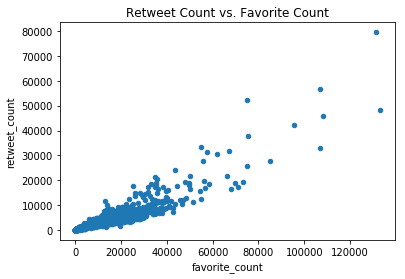

In [57]:
archive_master.plot(x= 'favorite_count', y= 'retweet_count', kind='scatter');
plt.title('Retweet Count vs. Favorite Count');

The tweets that have the highest favorite counts also have the highest retweet counts. There's generally a lot less retweets compared to favorited tweets. The scatterplot of reweet count vs. favorite count shows us that most of the tweets in this dataset have a favorite count below 50,000 and a retweet count below 20,000.  